In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
df=pd.read_csv('/content/City_Types.csv')
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial


In [ ]:
df.shape

(52704, 9)

In [ ]:
df.isna().sum()

,0
Date,0
City,0
CO,0
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
Type,0


In [ ]:
print(df['Type'].value_counts())

Type
Industrial     26352
Residential    26352
Name: count, dtype: int64


In [ ]:
df.dtypes

,0
Date,object
City,object
CO,float64
NO2,float64
SO2,float64
O3,float64
PM2.5,float64
PM10,float64
Type,object


In [ ]:
x = df.drop(columns=["Date","City","Type"])
y = df["Type"]

In [ ]:
x.head()

,CO,NO2,SO2,O3,PM2.5,PM10
0,208.0,15.9,13.2,44.0,8.6,9.4
1,207.0,17.4,13.7,44.0,8.6,10.5
2,217.0,19.0,15.5,43.0,10.4,12.9
3,231.0,21.0,20.7,36.0,12.3,15.3
4,263.0,34.5,27.2,27.0,13.6,20.0


In [ ]:
y.head()

,Type
0,Industrial
1,Industrial
2,Industrial
3,Industrial
4,Industrial


In [ ]:
y_le = LabelEncoder()
y = y_le.fit_transform(y)

In [ ]:
std = StandardScaler()
x = std.fit_transform(x)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
train_xgb = xgb.predict(x_train)

In [ ]:
train_xgb_acc = accuracy_score(y_train,train_xgb)
print(f"Train Accuracy: {train_xgb_acc*100}")

Train Accuracy: 99.82923416265446


In [ ]:
train_xgb_cm = confusion_matrix(y_train,train_xgb)
print(f"Train Confusion Matrix: \n{train_xgb_cm}")

Train Confusion Matrix: 
[[21088    56]
 [   16 21003]]


In [ ]:
test_xgb = xgb.predict(x_test)

In [ ]:
test_xgb_acc = accuracy_score(y_test,test_xgb)
print(f"Test Accuracy: {test_xgb_acc*100}")

Test Accuracy: 98.86158808462196


In [ ]:
test_xgb_cm = confusion_matrix(y_test,test_xgb)
print(f"Test Confusion Matrix: \n{test_xgb_cm}")

Test Confusion Matrix: 
[[5138   70]
 [  50 5283]]


In [ ]:
test_xgb_cr = classification_report(y_test,test_xgb)
print(f"Test Classification Report: \n{test_xgb_cr}")

Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5208
           1       0.99      0.99      0.99      5333

    accuracy                           0.99     10541
   macro avg       0.99      0.99      0.99     10541
weighted avg       0.99      0.99      0.99     10541



Confusion Matrix:


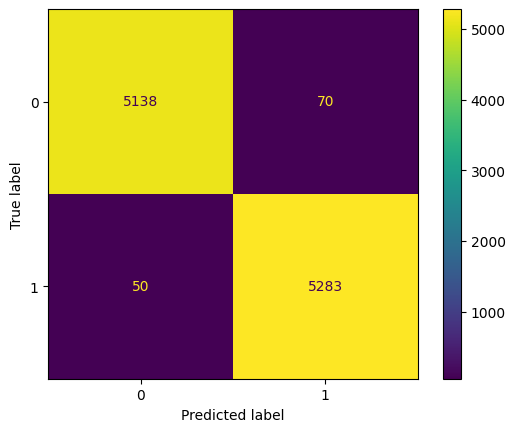

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test,test_xgb )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
train_rf = rf.predict(x_train)
train_rf_acc = accuracy_score(y_train,train_rf)
print(f"Train Accuracy: {train_rf_acc*100} %")
train_rf_cm = confusion_matrix(y_train,train_rf)
print(f"Train Confusion Matrix: {train_rf_cm*100} %")

test_rf = rf.predict(x_test)
test_rf_acc = accuracy_score(y_test,test_rf)
print(f"Test Accuracy: {test_rf_acc*100} %")
test_rf_cm = confusion_matrix(y_test,test_rf)
print(f"Test Accuracy: {test_rf_cm*100} %")

Train Accuracy: 100.0 %
Train Confusion Matrix: [[2114400       0]
 [      0 2101900]] %
Test Accuracy: 98.94696897827531 %
Test Accuracy: [[514500   6300]
 [  4800 528500]] %


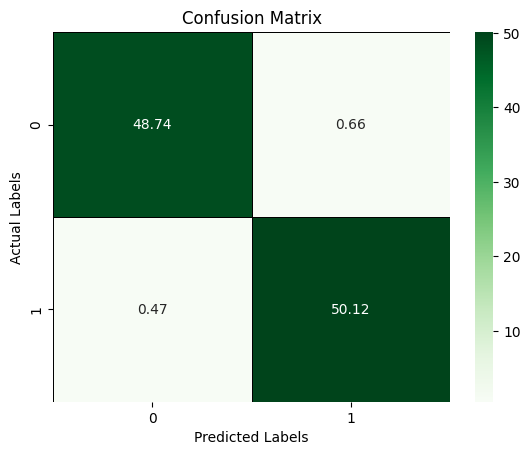

In [ ]:
sbn.heatmap((test_xgb_cm/test_xgb_cm.sum())*100,annot=True,fmt=".2f",cmap="Greens",linewidths=0.5,linecolor="Black")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()